In this file, I clean the data and merge the tables into one. This cleaned and merged table will be used in future work to create recommender systems

In [1]:
!kaggle datasets download -d antonkozyriev/game-recommendations-on-steam

Dataset URL: https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam
License(s): CC0-1.0
100% 658M/660M [00:06<00:00, 78.9MB/s]
100% 660M/660M [00:06<00:00, 110MB/s] 


In [2]:
!unzip game-recommendations-on-steam.zip

Archive:  game-recommendations-on-steam.zip
  inflating: games.csv               
  inflating: games_metadata.json     
  inflating: recommendations.csv     
  inflating: users.csv               


In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
# function that reduces memory usage
def reduce_memory(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        elif df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

In [5]:
games_df = reduce_memory(pd.read_csv('games.csv'))
recommendations_df = reduce_memory(pd.read_csv('recommendations.csv'))
users_df = reduce_memory(pd.read_csv('users.csv'))
games_metadata = pd.read_json('games_metadata.json', lines=True)

In [6]:
games_df.tail(2)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.0,0.0,0.0,True
50871,2488510,FatalZone,2023-10-23,True,False,False,Very Positive,88,144,4.0,0.0,0.0,True


In [7]:
recommendations_df.tail(2)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
41154792,696170,0,0,2018-06-11,True,4.0,1044289,41154792
41154793,1089980,2,0,2020-09-16,True,14.0,13971935,41154793


In [8]:
users_df.tail(2)

,user_id,products,reviews
14306062,5074363,0,0
14306063,5081164,0,0


In [9]:
games_metadata.tail(2)

,app_id,description,tags
50870,2272250,Embark on a journey into the darkest nightmare...,"[Early Access, FPS, Action, Retro, First-Perso..."
50871,2488510,,[]


In [10]:
games_df['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [11]:
# сonvert text scores to numeric values
rating_map = {
    'Overwhelmingly Positive': 5,
    'Very Positive': 4.5,
    'Positive': 4,
    'Mostly Positive': 3.5,
    'Mixed': 3,
    'Mostly Negative': 2.5,
    'Negative': 2,
    'Very Negative': 1.5,
    'Overwhelmingly Negative': 1
}


games_df['rating_numeric'] = games_df['rating'].map(rating_map)
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_numeric
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,4.5
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,4.0
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,4.5
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,3.0
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,4.5


<ipython-input-12-322bf92f20ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot( x='rating_numeric' , data = games_df ,


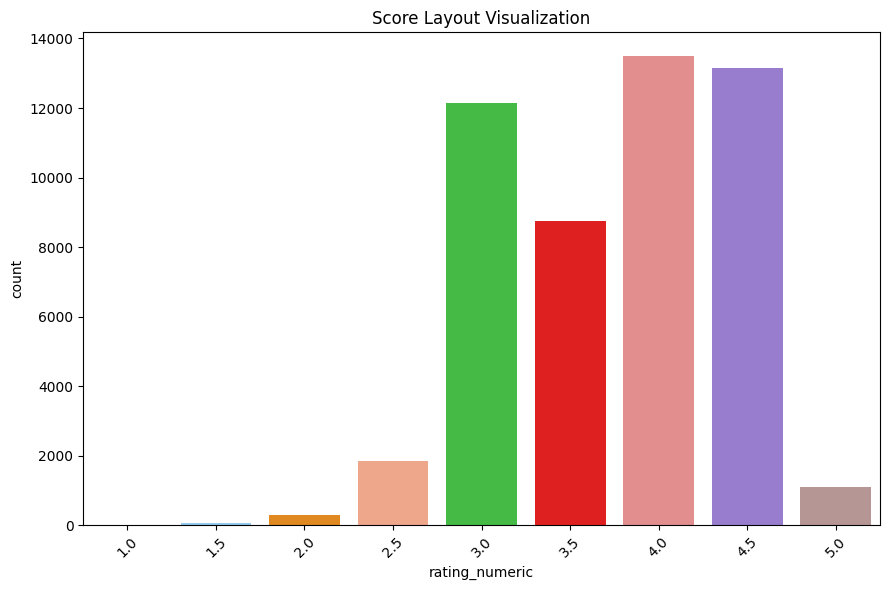

In [12]:
# score layout visualization
plt.figure(figsize=(9, 6))
sn.countplot( x='rating_numeric' , data = games_df ,
    palette = [
    'DeepSkyBlue',        # 5.0 Very Positive
    'LightSkyBlue',       # 4.5 Positive
    'DarkOrange',         # 4.0 Mixed
    'LightSalmon',        # 3.5 Mostly Positive
    'LimeGreen',          # 3.0 Overwhelmingly Positive
    'Red',                # 2.5 Negative
    'LightCoral',         # 2.0 Mostly Negative
    'MediumPurple',       # 1.5 Overwhelmingly Negative
    'RosyBrown'           # 1.0 Very Negative
])
plt.xticks(rotation=45)
plt.title('Score Layout Visualization')
plt.tight_layout()
plt.show()

In [13]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int32  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int32  
 8   user_reviews    50872 non-null  int32  
 9   price_final     50872 non-null  float32
 10  price_original  50872 non-null  float32
 11  discount        50872 non-null  float32
 12  steam_deck      50872 non-null  bool   
 13  rating_numeric  50872 non-null  float64
dtypes: bool(4), float32(3), float64(1), int32(3), object(3)
memory usage: 2.9+ MB


In [14]:
games_metadata.head(3)

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."


In [15]:
# convert tag list to a comma-separated string
games_metadata['tags_string'] = games_metadata['tags'].apply(lambda x: ', '.join(x))
games_metadata.head(3)

,app_id,description,tags,tags_string
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...","Action, Adventure, Parkour, Third Person, Grea..."
1,22364,,[Action],Action
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...","Co-op, Stealth, Indie, Heist, Local Co-Op, Str..."


In [16]:
games_metadata.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50872 non-null  int64 
 1   description  50872 non-null  object
 2   tags         50872 non-null  object
 3   tags_string  50872 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [17]:
games_metadata = games_metadata [['app_id', 'tags_string']]
games_metadata.head(2)

,app_id,tags_string
0,13500,"Action, Adventure, Parkour, Third Person, Grea..."
1,22364,Action


In [18]:
games_df = games_df[['app_id', 'title', 'rating_numeric']]
games_df.head(2)

,app_id,title,rating_numeric
0,13500,Prince of Persia: Warrior Within™,4.5
1,22364,BRINK: Agents of Change,4.0


In [19]:
recommendations_df = recommendations_df[['app_id','user_id']]
recommendations_df.head(2)

,app_id,user_id
0,975370,51580
1,304390,2586


In [20]:
data = pd.merge(recommendations_df, games_df, on='app_id', how='inner')
data.head(2)

,app_id,user_id,title,rating_numeric
0,975370,51580,Dwarf Fortress,5.0
1,975370,12159611,Dwarf Fortress,5.0


In [21]:
merged_data = pd.merge(games_metadata, data, on='app_id', how='inner')
merged_data.head(2)

,app_id,tags_string,user_id,title,rating_numeric
0,13500,"Action, Adventure, Parkour, Third Person, Grea...",3369378,Prince of Persia: Warrior Within™,4.5
1,13500,"Action, Adventure, Parkour, Third Person, Grea...",11294916,Prince of Persia: Warrior Within™,4.5


In [22]:
merged_data.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   tags_string     object 
 2   user_id         int32  
 3   title           object 
 4   rating_numeric  float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 1.4+ GB


In [23]:
merged_data['rating_numeric'].describe()

count    4.115479e+07
mean     4.383417e+00
std      5.902895e-01
min      1.000000e+00
25%      4.500000e+00
50%      4.500000e+00
75%      4.500000e+00
max      5.000000e+00
Name: rating_numeric, dtype: float64

In [24]:
# data filtering to remove users who rarely rated applications and applications with few ratings
user_rating_counts = merged_data['user_id'].value_counts()
app_rating_counts = merged_data['app_id'].value_counts()
user_rating_counts, app_rating_counts

(user_id
 11764552    6045
 5112758     4152
 11656130    3840
 5669734     3479
 11553593    3392
             ... 
 6141882        1
 2088363        1
 10360134       1
 201070         1
 13871385       1
 Name: count, Length: 13781059, dtype: int64,
 app_id
 440        319492
 252490     270684
 1091500    226414
 730        219737
 570        216914
             ...  
 1398300         1
 1823540         1
 2166630         1
 1892240         1
 1368960         1
 Name: count, Length: 37610, dtype: int64)

There are users and apps with a single rating (could be noise)

In [25]:
min_ratings_per_user = 5
min_ratings_per_app = 5


# repeat filtering until all users and applications meet the conditions
while True:
    initial_user_count = merged_data['user_id'].nunique()
    initial_app_count = merged_data['app_id'].nunique()

    # user filtering
    user_counts = merged_data['user_id'].value_counts()
    users_to_keep = user_counts[user_counts >= min_ratings_per_user].index
    merged_data = merged_data[merged_data['user_id'].isin(users_to_keep)]

    # application filtering
    app_counts = merged_data['app_id'].value_counts()
    apps_to_keep = app_counts[app_counts >= min_ratings_per_app].index
    merged_data = merged_data[merged_data['app_id'].isin(apps_to_keep)]

    # check if the number of users and applications has changed
    final_user_count = merged_data['user_id'].nunique()
    final_app_count = merged_data['app_id'].nunique()

    if initial_user_count == final_user_count and initial_app_count == final_app_count:
        break

In [26]:
# recheck the rating distribution
user_rating_counts = merged_data['user_id'].value_counts()
app_rating_counts = merged_data['app_id'].value_counts()
user_rating_counts.describe(), app_rating_counts.describe()

(count    1.910450e+06
 mean     1.174288e+01
 std      1.944924e+01
 min      5.000000e+00
 25%      6.000000e+00
 50%      8.000000e+00
 75%      1.200000e+01
 max      5.985000e+03
 Name: count, dtype: float64,
 count     34369.000000
 mean        652.744537
 std        3663.220811
 min           5.000000
 25%          14.000000
 50%          38.000000
 75%         163.000000
 max      135819.000000
 Name: count, dtype: float64)

In [27]:
# check the size of the data
merged_data.shape

(22434177, 5)

In [28]:
# check the number of empty rows in the 'tags_string' column
empty_rows_count = merged_data['tags_string'].str.strip().eq('').sum()
empty_rows_count

9527214

In [29]:
# delete rows with empty values in the 'tags_string' column
merged_data = merged_data[merged_data['tags_string'] != '']
merged_data.shape

(12906963, 5)

In [30]:
empty_rating_numeric = merged_data['rating_numeric'].isna().sum()
empty_rating_numeric

0

In [33]:
sampled_data = merged_data.sample(n=1000000, random_state=42)
sampled_data.shape

(1000000, 5)

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
file_path = '/content/drive/My Drive/sampled_data.csv'
sampled_data.to_csv(file_path, index=False)